<a href="https://colab.research.google.com/github/christinabrnn/Python-Study/blob/main/BA820/Clustering_Synthetic_Data_unsolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

To appreicate the bells and whistles of different clustering techniques, it is best to first play with some synthetic data.

## Let's create some data

In [1]:
import pandas as pd
import seaborn as sns

Let's create two clusters.

<Axes: xlabel='x', ylabel='y'>

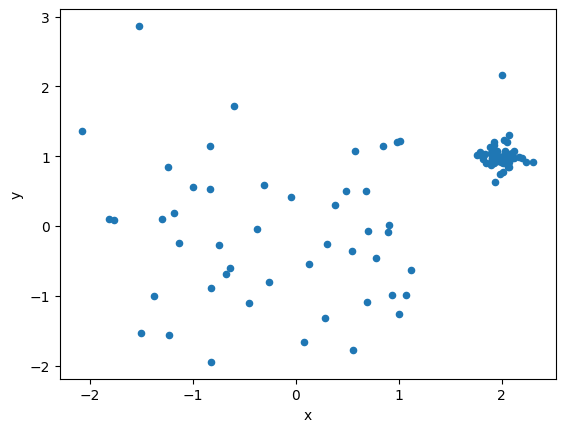

In [2]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=[[0,0]], n_features=2,  cluster_std = 1)
df = pd.DataFrame(X, columns=['x', 'y'])

X, _ = make_blobs(n_samples=50, centers=[[2,1]], n_features=2,  cluster_std = 0.1)
df2 = pd.DataFrame(X, columns=['x', 'y'])

df = pd.concat([df, df2], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis - Hierarchical

<Axes: xlabel='x', ylabel='y'>

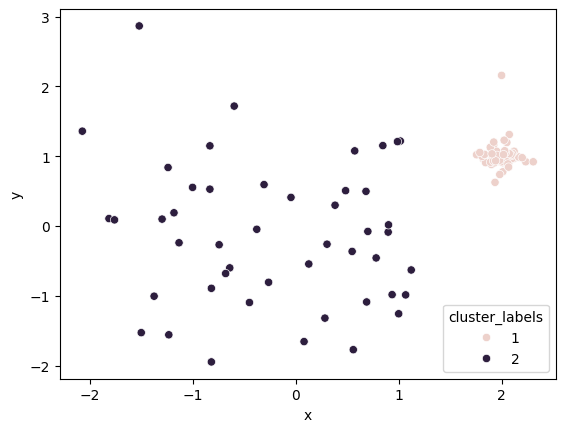

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster

n_clusters = 2

Z =linkage(df, method = 'ward')
df['cluster_labels'] = fcluster(Z, n_clusters, criterion = 'maxclust')

sns.scatterplot(df, x = 'x', y = 'y', hue = 'cluster_labels')

Plot the dendrogram

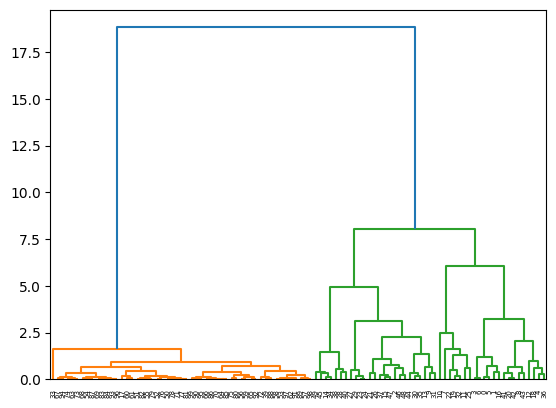

In [6]:
from scipy.cluster.hierarchy import dendrogram
_ = dendrogram(Z)

## Cluster Analysis - Kmeans

Let's compare the hierarchial clustering result with k-means

In [7]:
from sklearn.cluster import KMeans

In [8]:
df_kmeans = df.drop('cluster_labels', axis=1)

Find the cluster centroids

In [9]:
# Try with random or specific initializations.
kmeans_result = KMeans(n_clusters,init='random').fit(df_kmeans)  #, init = [[2, 1 ],[0, 0]]

In [10]:
# where are the centroids?
kmeans_result.cluster_centers_

array([[ 1.91517351,  1.01886261],
       [-0.303874  , -0.23919162]])

Assign each point to its cluster

In [12]:
df_kmeans['cluster_labels'] = kmeans_result.labels_

Plot the clustering

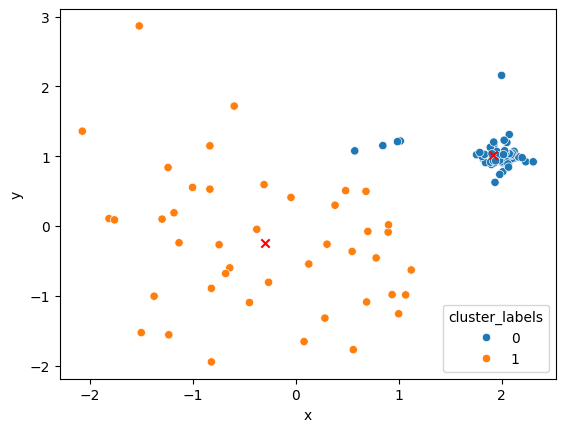

In [16]:
import matplotlib.pyplot as plt

# Plot clusters
sns.scatterplot(x = 'x', y = 'y', hue = 'cluster_labels', data=df_kmeans)

#plot centroids
plt.scatter(kmeans_result.cluster_centers_[:,0], kmeans_result.cluster_centers_[:,1], color='red', marker='x')

# Show the plot with the new points
plt.show()

## Let's try 3D data

Let's create some 3D data and use it for k-means using.

In [17]:
import numpy as np

# First distribution

num_samples = 100
centers = [[0, 0, 0]]
cluster_std = [[1, np.sqrt(2), 1]]

samples, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [18]:
# Second distribution

num_samples = 100
centers = [[3, 3, 3]]
cluster_std = [[np.sqrt(2), 1, 1]]

samples2, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [19]:
# Third distribution

num_samples = 150
centers = [[5, 5, 5]]
cluster_std = [[0.5,1,0.5]]

samples3, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

Let's put all samples together in a dataframe

In [20]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [21]:
df_3d

,x,y,z
0,0.093767,0.502810,0.607108
1,1.949282,-2.015208,0.989864
2,-0.277260,1.115393,0.389224
3,-0.912041,1.154323,-1.203376
4,-0.493444,0.263827,-2.387431
...,...,...,...
145,5.309227,5.539949,5.480584
146,4.890343,5.543738,5.378039
147,4.628494,4.151230,5.134514
148,4.924158,5.351640,5.119548


Let's [plot it](https://plotly.com/python/3d-scatter-plots/) in 3D.

In [22]:
import plotly.express as px

fig = px.scatter_3d(df_3d, )
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try some hierarchical clustering

In [23]:
Z = linkage(df_3d, method = 'ward')
df_3d['cluster_labels'] = fcluster(Z, n_clusters, criterion = 'maxclust')

In [24]:
fig = px.scatter_3d(df_3d, )
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try k-means

In [25]:
kmeans_model = KMeans(3, init = 'random')
kmeans_result = kmeans_model.fit(df_3d[['x', 'y', 'z']])

In [26]:
df_3d['cluster_labels'] = kmeans_result.labels_
df_3d

,x,y,z,cluster_labels
0,0.093767,0.502810,0.607108,2
1,1.949282,-2.015208,0.989864,2
2,-0.277260,1.115393,0.389224,2
3,-0.912041,1.154323,-1.203376,2
4,-0.493444,0.263827,-2.387431,2
...,...,...,...,...
145,5.309227,5.539949,5.480584,0
146,4.890343,5.543738,5.378039,0
147,4.628494,4.151230,5.134514,0
148,4.924158,5.351640,5.119548,0


In [27]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3)
fig.show()

##Let's find the best number of clusters using both silouette and inertia.

We will use [`yellowbrick`](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

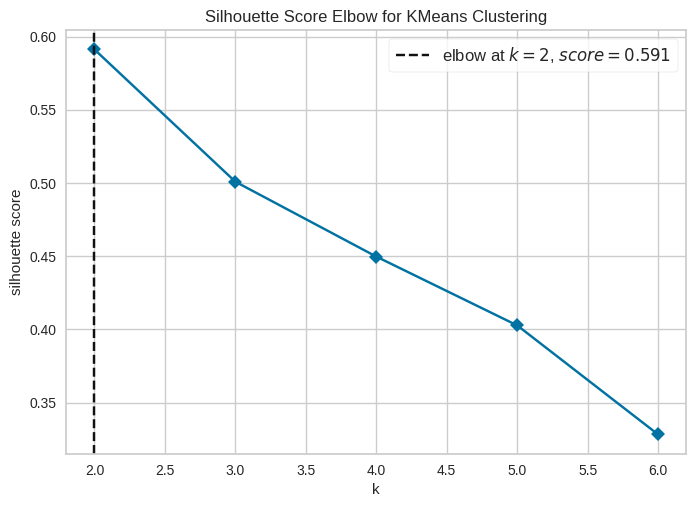

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_model, k=(2,7), metric="silhouette", timings=False)

visualizer.fit(df_3d[['x', 'y', 'z']])
visualizer.show()

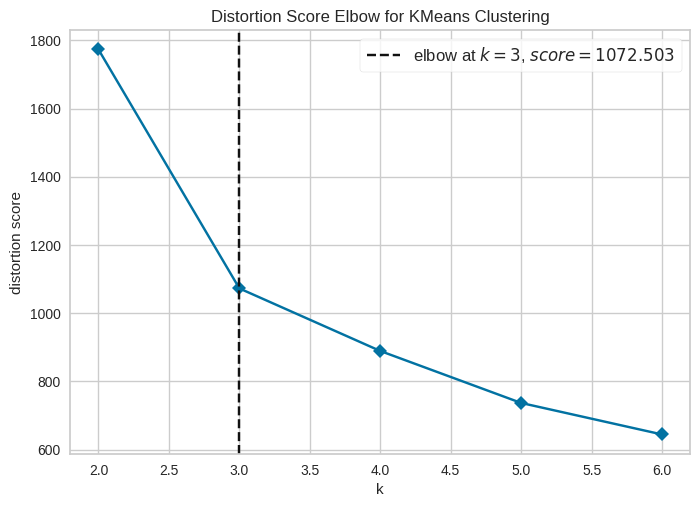

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_model, k=(2,7), metric="distortion", timings=False)

visualizer.fit(df_3d[['x', 'y', 'z']])
visualizer.show()

###Let's visualize the silouette figure for 3 clusters

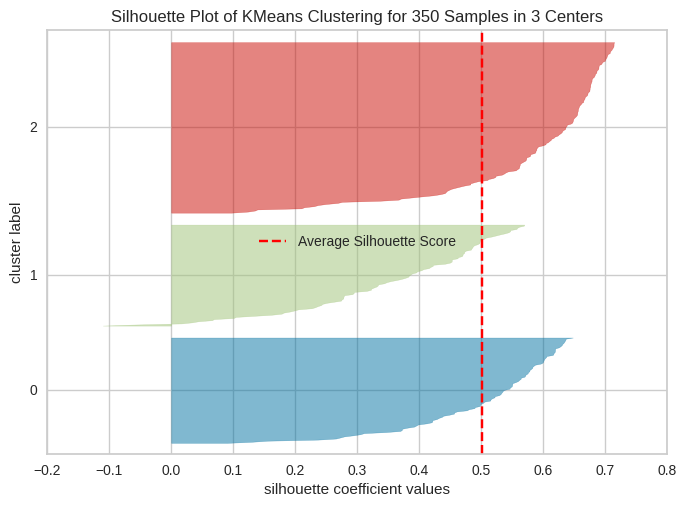

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 350 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(3,init='random')
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick', timings=False)

visualizer.fit(df_3d[['x', 'y', 'z']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

##Things we could try:


1.   What if we make the data non-Gaussian? Try [generating swiss rolls or curves](https://scikit-learn.org/1.5/datasets/sample_generators.html#generators-for-manifold-learning).
2.   Trying different densities, sizes, number of clusters, initialization, etc.
